In [2]:
import pandas as pd
import numpy as np

## Import User and Artist Dataset

In [3]:
#Reading the 'plays' dataset, turning all items into integers
users = pd.DataFrame(np.array([i.strip().split("\t") for i in open('lastfm_data/user_artists.dat', 'r', encoding='latin-1').readlines()]),
                       columns = ['userID', 'artistID', 'plays'])
users = users.drop(users.index[0])
users = users.apply(pd.to_numeric)
users.head()

#Reading 'artists' dataset, splitting the first column into three columns on the newline, turning artistid into int
artists = pd.DataFrame(open('lastfm_data/artists.dat', 'r',  encoding='latin-1').readlines())
artists = pd.DataFrame(artists[0].str.split("\t").values.tolist(),columns = ['artistID', 'name', 'url', 'pictureURL'])
artists = artists.drop(artists.index[0])
artists = artists.drop(columns=['pictureURL'])
artists['artistID'] = artists['artistID'].apply(pd.to_numeric)


In [4]:
print(users.head())
print()
print(artists.head())

   userID  artistID  plays
1       2        51  13883
2       2        52  11690
3       2        53  11351
4       2        54  10300
5       2        55   8983

   artistID               name                                         url
1         1       MALICE MIZER       http://www.last.fm/music/MALICE+MIZER
2         2    Diary of Dreams    http://www.last.fm/music/Diary+of+Dreams
3         3  Carpathian Forest  http://www.last.fm/music/Carpathian+Forest
4         4       Moi dix Mois       http://www.last.fm/music/Moi+dix+Mois
5         5        Bella Morte        http://www.last.fm/music/Bella+Morte


In [5]:
users_artists = pd.merge(users, artists, on='artistID', how='left')

In [34]:
users_artists.head(20)

,userID,artistID,plays,name,url
0,2,51,13883,Duran Duran,http://www.last.fm/music/Duran+Duran
1,2,52,11690,Morcheeba,http://www.last.fm/music/Morcheeba
2,2,53,11351,Air,http://www.last.fm/music/Air
3,2,54,10300,Hooverphonic,http://www.last.fm/music/Hooverphonic
4,2,55,8983,Kylie Minogue,http://www.last.fm/music/Kylie+Minogue
5,2,56,6152,Daft Punk,http://www.last.fm/music/Daft+Punk
6,2,57,5955,Thievery Corporation,http://www.last.fm/music/Thievery+Corporation
7,2,58,4616,Goldfrapp,http://www.last.fm/music/Goldfrapp
8,2,59,4337,New Order,http://www.last.fm/music/New+Order
9,2,60,4147,Matt Bianco,http://www.last.fm/music/Matt+Bianco


## Create User-Artist Matrix

In [7]:
# Create a utility matrix A by pivoting ratings.df
users_artists_piv = users_artists.pivot(index = 'userID', columns = 'name', values = 'plays').fillna(0)
users_artists_piv.head()

name,!!!,!DISTAIN,!deladap,"""Weird Al"" Yankovic",#####,#2 Orchestra,$lick,$lick feat. Six-Fo,(1962-1966),(Pre) Kingdom,...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
userID,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
users_artists_piv = users_artists_piv.loc[(users_artists_piv.sum(axis=1) > 1), (users_artists_piv.sum(axis=0) > 150)]



In [9]:
users_artists_piv.head()

name,!!!,!DISTAIN,"""Weird Al"" Yankovic",#####,$lick,(hed) Planet Earth,*NSYNC,+44,+\-,-OZ-,...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
userID,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
users_artists_piv=users_artists_piv.reset_index()

In [11]:
users_artists_piv.head()

name,userID,!!!,!DISTAIN,"""Weird Al"" Yankovic",#####,$lick,(hed) Planet Earth,*NSYNC,+44,+\-,...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create a pivot tabs with Artists as rows, users as columns

In [139]:
artists_users_piv = users_artists.pivot(index = 'name', columns = 'userID', values = 'plays').fillna(0)
artists_users_piv.head()

userID,2,3,4,5,6,7,8,9,10,11,...,2090,2091,2092,2093,2094,2095,2096,2097,2099,2100
name,,,,,,,,,,,,,,,,,,,,,
!!!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!DISTAIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!deladap,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Weird Al"" Yankovic",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#####,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
play_counts = users_artists_piv.sum(axis = 0, skipna = True).sort_values(ascending = False)
play_counts = pd.DataFrame(play_counts, columns = ['plays'])
play_counts.head()

,plays
name,
Britney Spears,2393140.0
userID,1964716.0
index,1788886.0
Depeche Mode,1301308.0
Lady Gaga,1291387.0


## Top 20 EDA Stuff for Fun

In [15]:
top_20 = pd.DataFrame(play_counts.nlargest(20, 'plays'))

In [16]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Top 20 artists by # Plays')

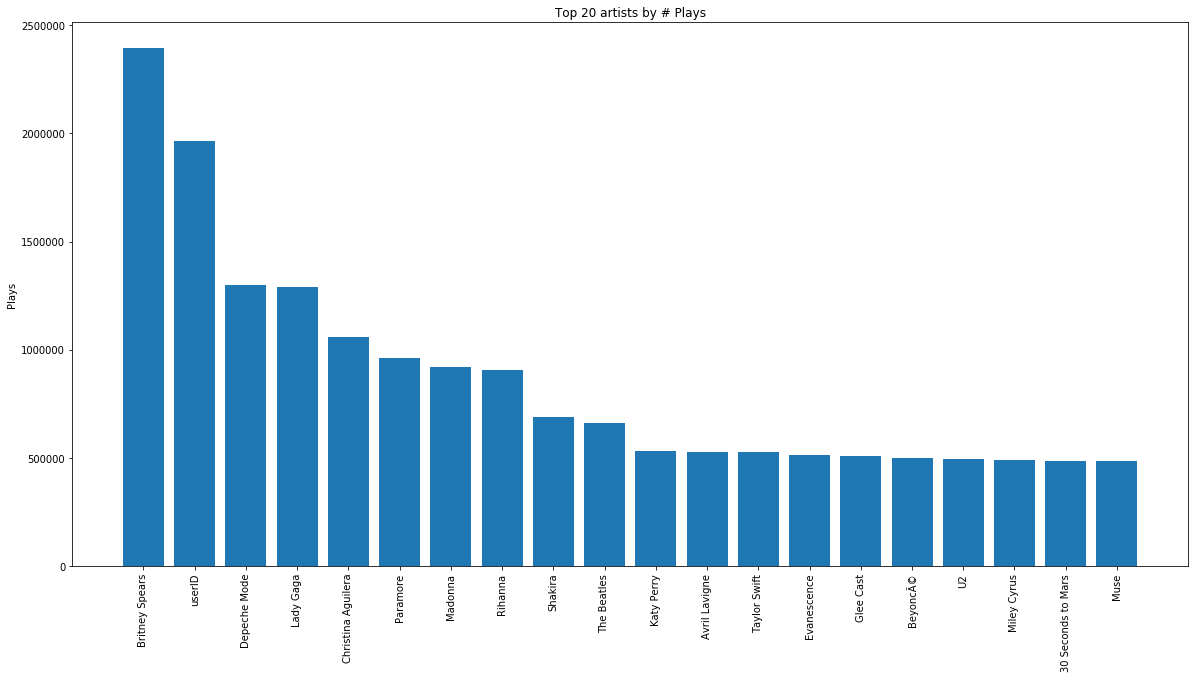

In [17]:
plt.figure(figsize=(20,10))
plt.bar(top_20.index, top_20['plays'])
plt.ylabel('Plays')
plt.xticks(top_20.index, rotation='vertical')
plt.title('Top 20 artists by # Plays')

## Using Cosine Similarity as distance metric

In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [142]:
artists = pd.DataFrame(users_artists_piv.columns)

In [143]:
users_artists_piv.head()

name,index,userID,!!!,!DISTAIN,"""Weird Al"" Yankovic",#####,$lick,(hed) Planet Earth,*NSYNC,+44,...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
df2=users_artists_piv.drop('userID', axis=1)
df2.shape
#1,892 users and 17,632 artists

(1892, 12252)

In [145]:
distance_matrix = cosine_similarity(df2.T)
distance_matrix.shape

(12252, 12252)

In [146]:
distDF = pd.DataFrame(distance_matrix, columns=(df2.columns), index=(df2.columns))
distDF.head()

name,index,!!!,!DISTAIN,"""Weird Al"" Yankovic",#####,$lick,(hed) Planet Earth,*NSYNC,+44,+\-,...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
name,,,,,,,,,,,,,,,,,,,,,
index,1.000000,0.030698,0.028959,0.034885,0.022136,0.032277,0.066491,0.073113,0.050903,0.011454,...,0.018687,0.00809,0.036683,0.001516,0.036656,0.036656,0.036656,0.036656,0.036656,0.036656
!!!,0.030698,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
!DISTAIN,0.028959,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"""Weird Al"" Yankovic",0.034885,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
#####,0.022136,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [147]:
distDF['Nicki Minaj'].sort_values(ascending = False)[0:21]

name
Nicki Minaj                                 1.000000
Shania Twain                                0.470946
Reese Witherspoon                           0.467139
The Nitty Gritty Dirt Band                  0.467139
Joaquin Phoenix & Reese Witherspoon         0.449339
Dev                                         0.410243
Drake                                       0.389431
Katy Perry                                  0.383021
Gwen Stefani                                0.375907
Jerry Reed                                  0.375602
Christina Aguilera, Lil' Kim, Mya & Pink    0.375262
Christina Aguilera a dÃºo con Luis Fonsi    0.375262
Andre 3000                                  0.375179
Young Money                                 0.371997
Josh Farro                                  0.352394
Chris Brown                                 0.351569
Example                                     0.344657
Tinie Tempah                                0.343748
Professor Green                          

## Creating a Binary Dataset

In [11]:
users_artists_piv.head()

name,userID,!!!,!DISTAIN,"""Weird Al"" Yankovic",#####,$lick,(hed) Planet Earth,*NSYNC,+44,+\-,...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
binary = users_artists_piv.copy(deep=True)
binary.index = binary['userID']

In [13]:
binary = binary.drop('userID', axis =1)

In [14]:
binary[binary>=1]=1

In [15]:
binary = binary.reset_index()

In [153]:
binary.head()

name,userID,index,!!!,!DISTAIN,"""Weird Al"" Yankovic",#####,$lick,(hed) Planet Earth,*NSYNC,+44,...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df2_binary=binary.drop('userID', axis=1)
df2_binary.shape
#1,892 users and 17,632 artists

(1892, 12251)

In [19]:
distance_matrix_binary = cosine_similarity(df2_binary.T)
distance_matrix_binary.shape

(12251, 12251)

In [21]:
distDF_binary = pd.DataFrame(distance_matrix_binary, columns=(df2_binary.columns), index=(df2_binary.columns))
distDF_binary.head()

name,!!!,!DISTAIN,"""Weird Al"" Yankovic",#####,$lick,(hed) Planet Earth,*NSYNC,+44,+\-,-OZ-,...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
name,,,,,,,,,,,,,,,,,,,,,
!!!,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!DISTAIN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Weird Al"" Yankovic",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#####,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$lick,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
distDF_binary_idx = distDF_binary.reset_index()

In [42]:
distDF_binary_idx.head()

name,name,!!!,!DISTAIN,"""Weird Al"" Yankovic",#####,$lick,(hed) Planet Earth,*NSYNC,+44,+\-,...,í°ìë¼,íì,ï¼¬ï½ï¼¬ï½,ï¼­ï¼¡ï¼®ï¼®ï¼¥ï¼±ï¼µï¼©ï¼®,ï¼°ï¼¥ï¼²ï¼¥ï¼³ï¼´ï¼²ï¼¯ï¼©ï¼«ï¼¡,ï¼²ï¼¥ï¼¤,ï¼¶ï½ï½ï½ ï½ï½ï¼¡,ï½ï½ï½ï½ï½ï½ ï½ï½ï½,ï½ï½ï½ï½,ï½ï½ï½ï½ï½ï½ï½
0,!!!,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,!DISTAIN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"""Weird Al"" Yankovic",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,#####,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,$lick,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
artists_and_top_10 = pd.DataFrame(columns=list(range(0,11)))

In [78]:
artists_and_top_10.columns = ['Artist',1,2,3,4,5,6,7,8,9,10]

In [81]:
artists_and_top_10.to_csv('top_10_matrix.csv')

In [73]:
for idx, row in distDF_binary_idx.iterrows():
    artists = []
    artists.append(row['name'])
    top_10 = row[1:].sort_values(ascending=False)[1:11]
    for artist, dist in top_10.iteritems():
        artists.append(artist)
    artists_and_top_10.loc[idx] = pd.Series(artists)

In [162]:
distDF_binary['Avril Lavigne'].sort_values(ascending = False)[0:21]

name
Avril Lavigne         1.000000
Katy Perry            0.670993
Britney Spears        0.638724
Rihanna               0.629935
Ke$ha                 0.607421
Miley Cyrus           0.605195
Christina Aguilera    0.597131
Lady Gaga             0.592356
P!nk                  0.560805
BeyoncÃ©              0.557908
Taylor Swift          0.545282
Ashley Tisdale        0.544487
Shakira               0.534652
Kelly Clarkson        0.534513
Paramore              0.534444
Black Eyed Peas       0.491511
The Pussycat Dolls    0.478014
Glee Cast             0.474814
index                 0.469594
Kylie Minogue         0.459556
Jennifer Lopez        0.457291
Name: Avril Lavigne, dtype: float64

In [161]:
distDF_binary.to_csv('binary_cosine_matrix.csv')

In [16]:
df = pd.read_csv('top_10_matrix.csv', low_memory=False).iloc[:,1:]

In [20]:
new_df = df.T
new_df.columns = new_df.iloc[0]
new_df = new_df.iloc[1:,:]

In [27]:
list(new_df['!!!'])

['Supercar',
 'autoKratz',
 '80kidz',
 'æ\x96\x89è\x97¤å\x92\x8cç¾©',
 'I-Dep',
 'ä¸\x89è\x88¹ã\x80\x80æµ©ï¼\x8fã\x82\xadã\x83³ã\x82°ç\x94·å£°å\x90\x88å\x94±å\x9b£',
 'Siba e a Fuloresta',
 'Macdonald Duck Eclair',
 'Elias and The Wizzkids',
 'Plus-Tech Squeeze Box']

In [28]:
print(new_df['The Glitch Mob'].to_dict("rows"))

TypeError: unsupported type: <class 'str'>

In [33]:
new_df['The Glitch Mob'].to_dict()

{'1': 'Yppah',
 '2': 'Ð\x9dÐµÑ\x82 Ð¡Ð½Ð°',
 '3': 'Microfilm',
 '4': 'Goatika Creative Lab',
 '5': 'Esoterica',
 '6': 'The Glitch Mob',
 '7': 'Terranova',
 '8': 'Skafandr',
 '9': 'ASHES dIVIDE',
 '10': 'Marcus Miller'}